# Куличенко Владимир 
# БПМ172
# Вариант 16

## №5.1.16

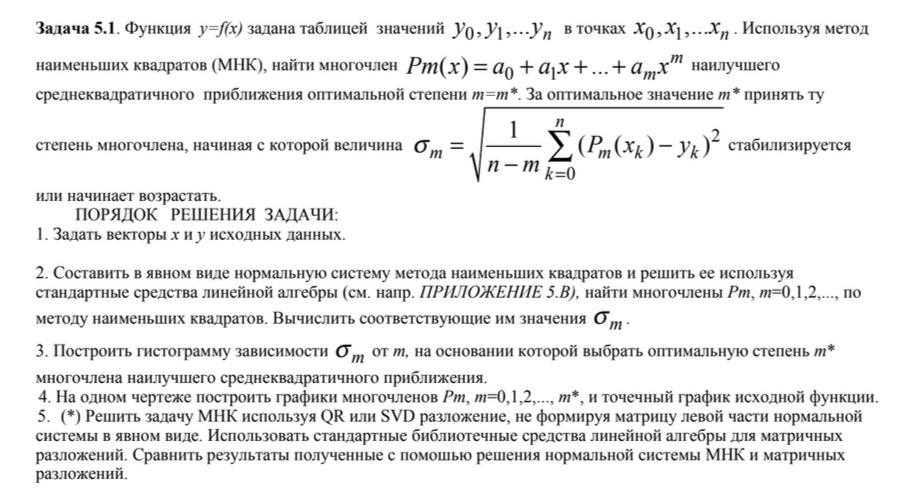

In [95]:
from IPython.display import Image
Image("lab5_t1.jpg")

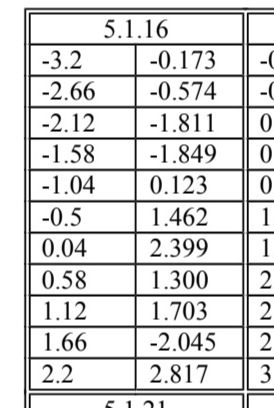

In [3]:
Image("l5_t1_xy.jpg")

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_triangular
from scipy import interpolate

### Пункт 1

#### Задаем векторы $x$ и $y$

In [5]:
X = np.arange(-3.2, 2.74, 0.54)
Y = np.array([-0.173, -0.574, -1.811, -1.849, 0.123, 
              1.462, 2.399, 1.3, 1.703, -2.045, 2.817])

print(X)
print(Y)

[-3.2  -2.66 -2.12 -1.58 -1.04 -0.5   0.04  0.58  1.12  1.66  2.2 ]
[-0.173 -0.574 -1.811 -1.849  0.123  1.462  2.399  1.3    1.703 -2.045
  2.817]


### Пункт 2

#### Находим коэффициенты разложения функции по базисным векторам методом наименьших квадратов

In [6]:
def mnk(x, y, m):
    A = np.array([[x[i]**j for j in range(m+1)] for i in range(x.shape[0])])
    w = np.linalg.solve(A.T@A, A.T@y)
    return w

def polynomial(x, coefs):
    res = 0
    for pow, w in enumerate(coefs):
        res += w * x**pow
    return res

def sigma(polynomial, x, y, coefs):
    return np.sum((polynomial(x, coefs)-y)**2)/(x.shape[0] - coefs.shape[0])

#### Находим многочлены $P_m$ и вычисляем соответсвующие им значения $\sigma _m$ 

In [7]:
sigma = np.vectorize(sigma, excluded=[0,1,2])
polynomial = np.vectorize(polynomial, excluded=[1])
m_grid = np.arange(0, X.shape[0]-1, 1)
coefs = [mnk(X, Y, m) for m in m_grid]
sigma_grid = sigma(polynomial, X, Y, coefs)

### Пункт 3

#### Строим гистограмму зависимости $\sigma _m$ от $m$

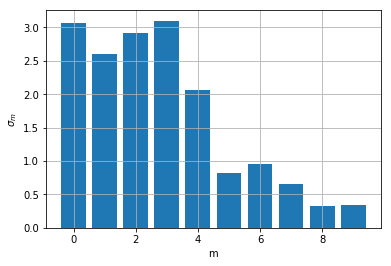

In [8]:
plt.bar(m_grid,sigma_grid)
plt.xlabel('m')
plt.ylabel('$\sigma_m$');
plt.grid()

По гистограмме видно, что $\sigma$ стабилизируется и перестает уменьшаться, начиная с $m=8$.

### Пункт 4 

#### Строим графики многочленов $P_m$ и точечный график исходной функции

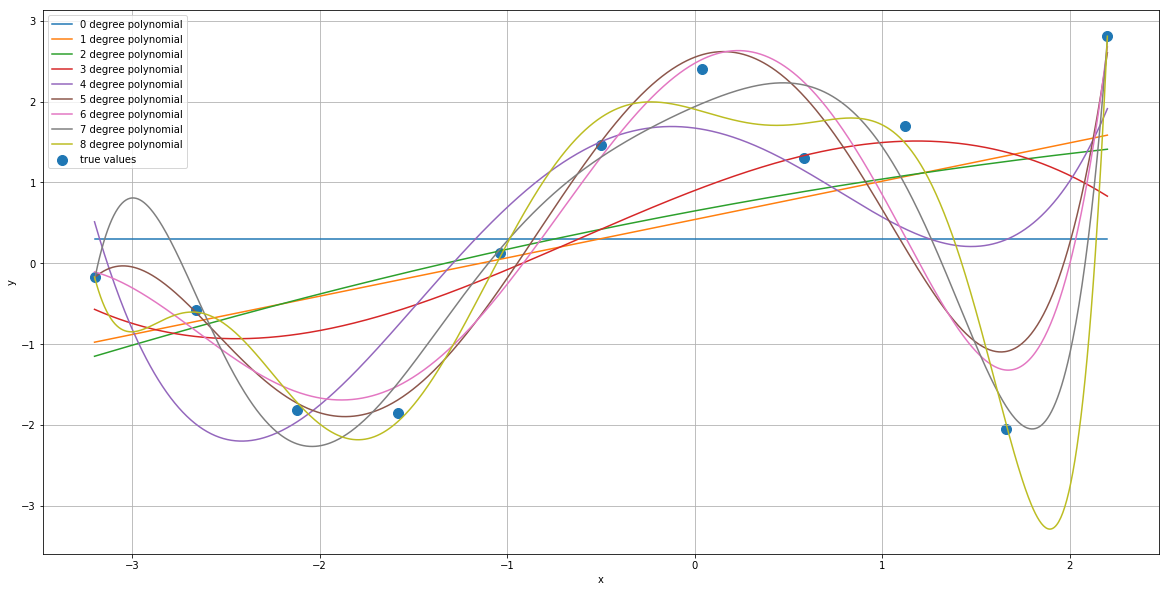

In [19]:
m_star = 8

plt.figure(figsize=(20,10))
plt.scatter(X, Y, label = 'true values', s=100)

for m in range(m_star+1):
    x_grid = np.linspace(X[0], X[-1], 1000)
    y_grid = polynomial(x_grid, mnk(X, Y, m))
    plt.plot(x_grid, y_grid, label = str(m)+' degree polynomial')
    
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

### Пункт 5

#### Решаем задачу МНК используя QR разложение

In [28]:
def mnk_QR(x, y, m):
    A = np.array([[x[i]**j for j in range(m+1)] for i in range(x.shape[0])])
    Q, R = np.linalg.qr(A)
    w = solve_triangular(R, Q.T@y)
    return w

In [29]:
np.allclose(mnk(X, Y, 8), mnk_QR(X, Y, 8))

True

Результат для многочлена 8 степени остался тем же. Все верно.

## №5.4.4

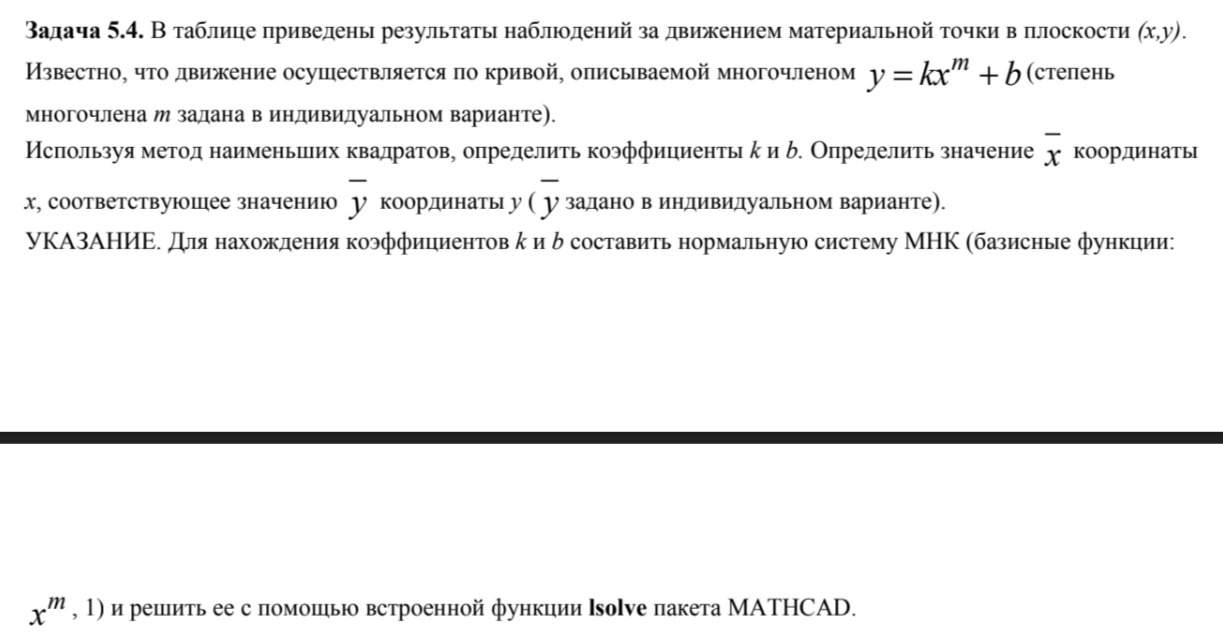

In [96]:
Image("lab5_t4.jpg")

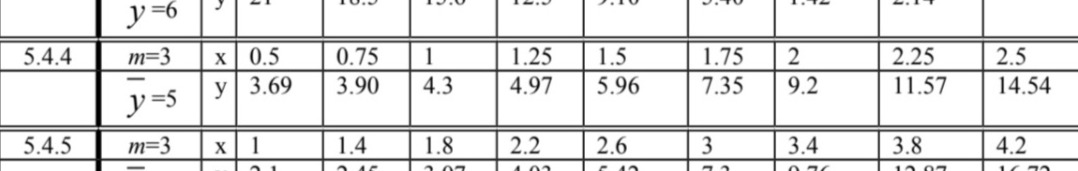

In [97]:
Image("lab5_t41.jpg")

### Задаем значения $x,y,m$ и $\bar{y}$

In [106]:
x = np.arange(0.5,2.75,0.25)
y = np.array([3.69, 3.9, 4.3, 4.97, 5.96, 7.35, 9.2, 11.57, 14.54])
m = 3
y_0 = 5

### Напишем функции нахождения коэффициентов и базисные функции $x^m$ и $1$

In [112]:
# Функция находит разложеие функций по базисным веторам X и Y
# Возвращает массив коэффициентов разложения по базисным векторам 
def mnk_phi(X, Y, funcs):
    A = np.array([[function(x) for function in funcs] for x in X])
    return np.linalg.solve(A.T.dot(A), A.T.dot(Y))

# Функция степени m
def fun1(x):
    return x**m

# Единичная функция
def fun2(x):
    return 1

### Находим коэфициенты $k$ и $b$ уравнения $y=kx^m+b$

In [113]:
coefs = mnk_phi(x, y, [fun1, fun2])
coefs

array([0.69984945, 3.60134594])

### Находим $x$ уравнения $0.69984945x^3 + 3.60134594 = 5$

In [120]:
x3 = (5-coefs[1])/coefs[0]

x_0 = x3**(1/3)

print('Найденная точка: (',x_0,',', (coefs[0] * fun1(x_0) + coefs[1] * fun2(x_0)),')')

Найденная точка: ( 1.25960747144546 , 5.0 )


### Проверка: построим на графике найденную функцию, указанные в задании точки и найденную точку $\bar{x}$

Text(0,0.5,'y')

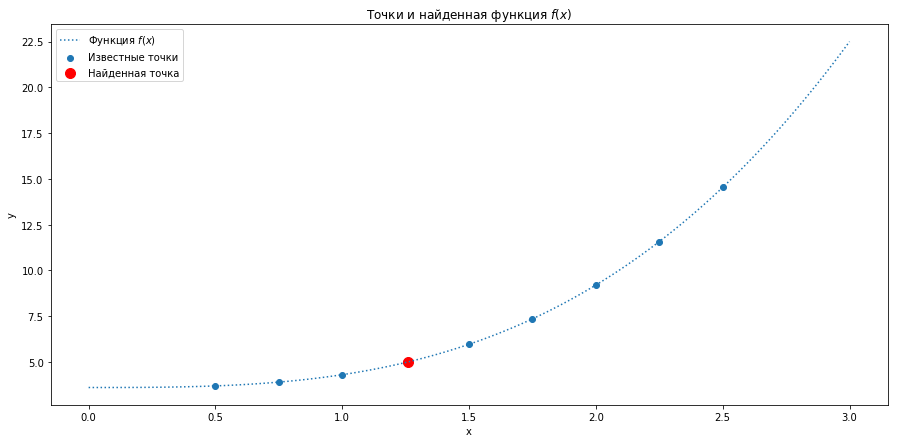

In [137]:
plt.figure(figsize = (15, 7))

plt.scatter(x, y, label = 'Известные точки')
plt.scatter(x_0, y_0, s=100, label = 'Найденная точка', c='r')
plt.xlabel('x')
plt.ylabel('y')
x_test = np.linspace(0,3,100)
plt.plot(x_test, coefs[0] * fun1(x_test) + coefs[1] * fun2(x_test), ls = ':', label='Функция $f(x)$')

plt.title('Точки и найденная функция $f(x)$')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

### Ответ: точка $\bar{x}$ имеет координаты $1.25960747144546$

## №5.7.8

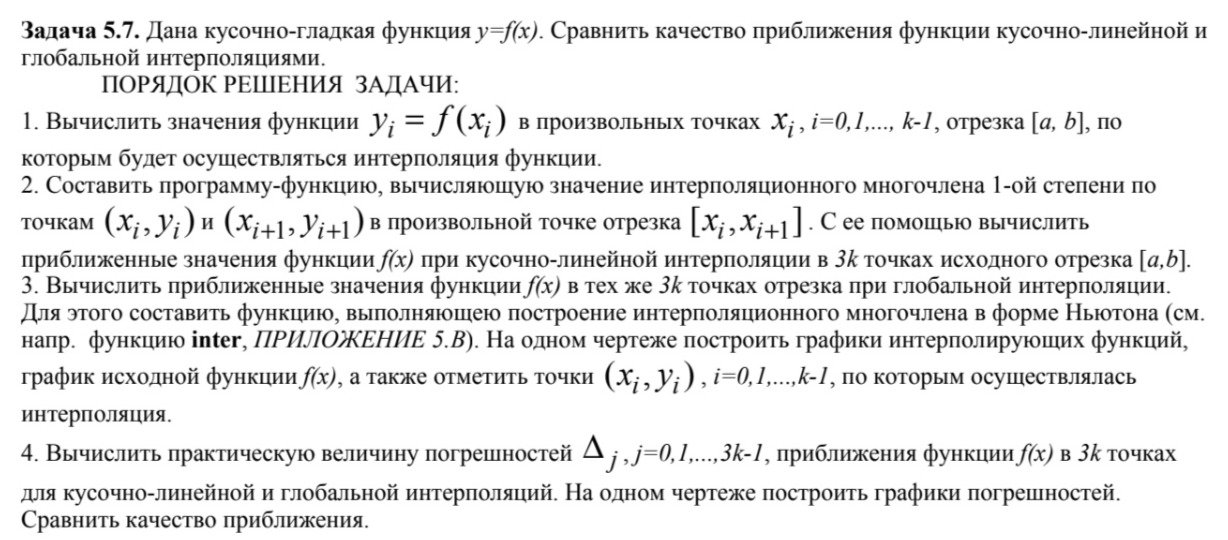

In [9]:
Image("lab5_t7.jpg")

$f(x) = (x+1) \cdot |x^2 - 2| $ 

$[a,b] = [0,2] $

### Пункт 1

#### Задаем значения $f(x)$ и находим значения функций $y_i = f(x)$

In [127]:
def func7(x):
    ans = (x+1)*(np.abs(x**2-2))
    return ans
a,b = 0,2
k = 10

x_i = np.linspace(a,b,num=k-1)
y_i = func7(x_i)

### Пункт 2

#### Напишем функцию, вычисляющую значение интерполяционного многочлена 1-ой степени по точкам ($x_i,y_i$) и ($x_{i+1},y_{i+1}$) в произвольной точке отрезка [$x_i,x_{i+1}$]

In [128]:
def interpolate_poly(x1, y1, x2, y2, xi):
    return (np.abs(y2 - y1))/(np.abs(x2 - x1))*xi - (np.abs(y2 - y1))/(np.abs(x2 - x1))*x1 + y1

#### С ее помощью вычисляем приближенные значения функции $f(x)$ в 3k точках исходного отрезка [a,b]

In [129]:
x_grid_int = np.random.uniform(a, b, 3*k)
#x_grid_int = np.linspace(a,b,num=3*k)
x_grid_int.sort()

In [130]:
y_grid_int = [interpolate_poly(x_i[i], y_i[i], x_i[j], y_i[j], x_grid_int[k])
            for (k, (i, j)) in enumerate(
                [(np.where(x_i < x)[0][-1], np.where(x_i > x)[0][0]) for x in x_grid_int])]

### Пункт 3

#### Напишем функцию, осуществля, выполняющею построение интерполяционного многочлена в форме Ньютона

In [5]:
def new_interp(x, y, t):
    n = x.shape[0]
    f = np.zeros((n, n))
    f[:, 0] = y
    for k in range(1, n):
        for i in range(n-k):
            f[i, k] = (f[i+1, k-1] - f[i, k-1]) / (x[i+k] - x[i])
    s = y[0]
    r = 1
    for k in range(0, n - 1):
        r = r * (t - x[k])
        s += f[0, k + 1] * r
    return s

#### Вычисляем приближенные значения $f(x)$ в тех же 3k точках

In [132]:
y_grid_int_newton = new_interp(x_i,y_i,x_grid_int)

#### Строим графики функций

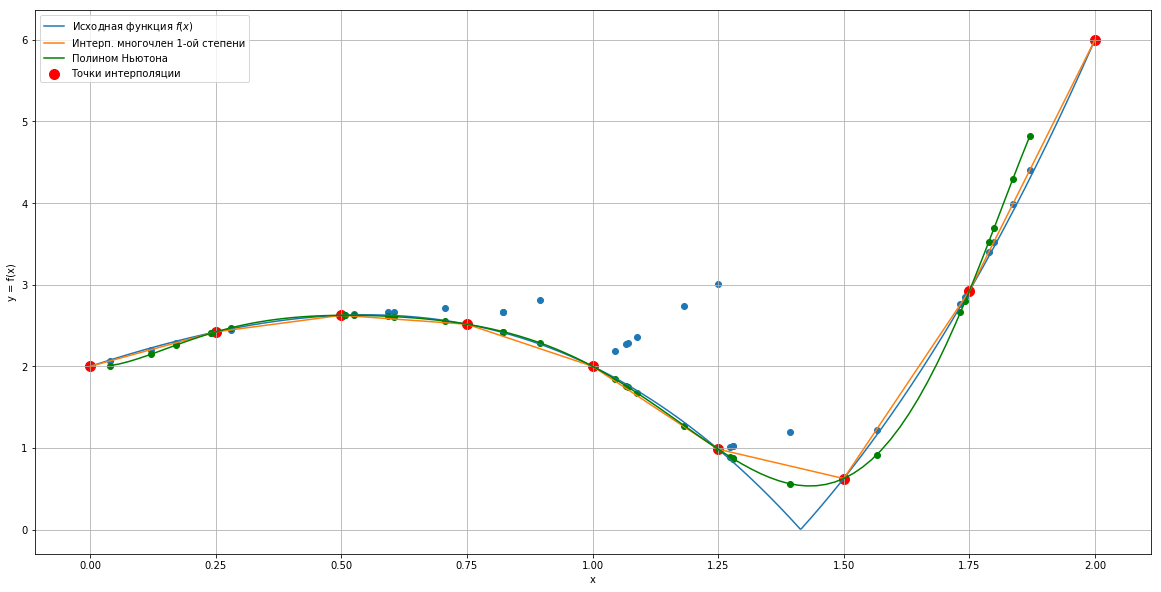

In [133]:
plt.figure(figsize=(20,10))

plotting_x_grid = np.linspace(a, b, 1000)
plotting_y_grid = func7(plotting_x_grid)

plt.plot(plotting_x_grid, plotting_y_grid, label = 'Исходная функция $f(x)$')
plt.scatter(x_i, y_i, c = 'r', s = 100, marker = 'o', label = 'Точки интерполяции')

plt.scatter(x_grid_int, y_grid_int, marker='o')
plt.plot(x_i, y_i, label = 'Интерп. многочлен 1-ой степени');

plotting_x_grid = np.linspace(x_grid_int[0], x_grid_int[-1], 100)
plotting_y_grid = new_interp(x_i, y_i, plotting_x_grid)

plt.plot(plotting_x_grid, plotting_y_grid, c = 'g', label = 'Полином Ньютона');
plt.scatter(x_grid_int, y_grid_int_newton, marker='o', c='g')

plt.xlabel('x')
plt.ylabel('y = f(x)')
plt.grid()
plt.legend();

### Пункт 4

#### Вычисляем погрешности для кусочно-линейной и глобальной интерполяции

In [134]:
y_grid_true = func7(x_grid_int)
d_piece = np.abs(y_grid_int - y_grid_true)
d_newton = np.abs(y_grid_int_newton - y_grid_true)

#### Строим график погрешностей для кусочно-линейной и глобальной интерполяции

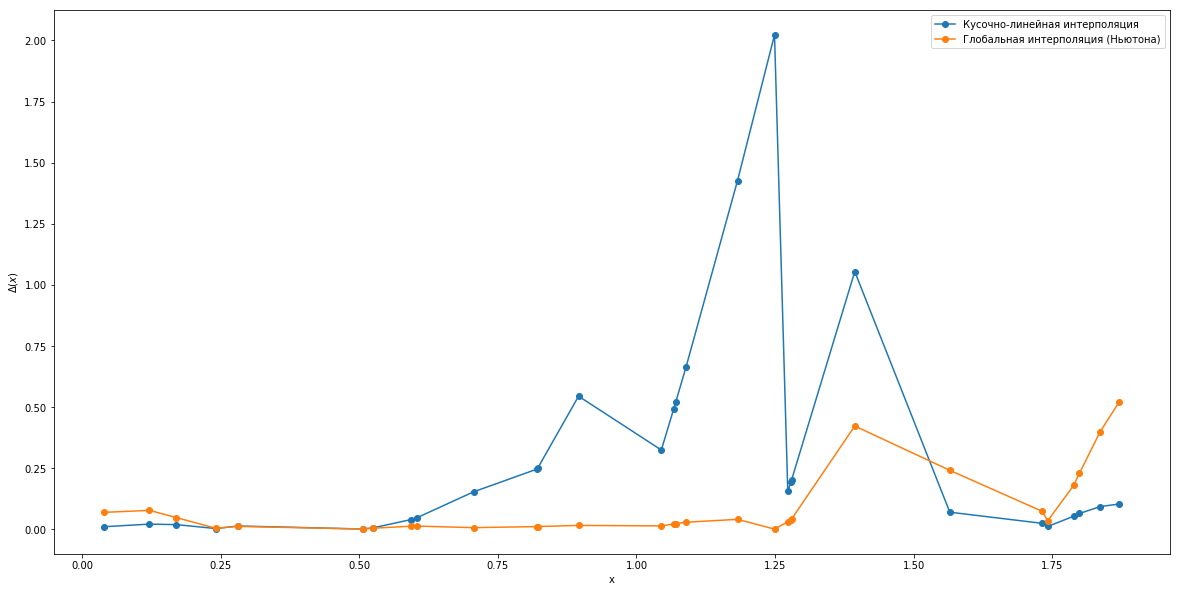

In [135]:
plt.figure(figsize=(20,10))
plt.plot(x_grid_int, d_piece, 'o-', label = 'Кусочно-линейная интерполяция')
plt.plot(x_grid_int, d_newton, 'o-', label = 'Глобальная интерполяция (Ньютона)')

plt.xlabel('x')
plt.ylabel('$\Delta(x)$')
plt.legend();

Как видно по графикам, глобальная интерполяция дает лучшее приближение для данной функции $f(x)$, но, с увеличением $x$, погрешность кусочно-линейной интерполяции становится меньше, а 'Глобальная' наоборот повышается.

## №5.9.8

### Задача 5.9. 
Дана функция $y=f(x)$. Приблизить $f(x)$ на отрезке [a, b] методом глобальной интерполяции и указанным в индивидуальном варианте сплайном. На одном чертеже построить графики приближающей функции и функции $f(x)$. Сравнить качество приближения при разном количестве узлов интерполяции.

### Вариант 5.9.8

$f(x) = 12 \cdot sin(e^x)$

[a,b] = [1,1.28]

Индивидуальный сплайн: 'Квадратичный'

### Задаем значения и строим функцию $f(x)$

In [6]:
def func_9(x):
    return 12*np.sin(np.exp(x))

a = 1
b = 1.28

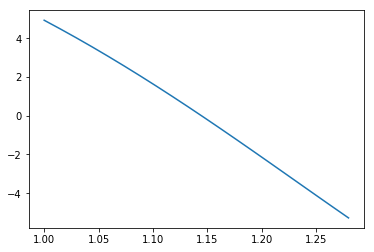

In [7]:
x = np.linspace(a, b, 20)
y = func_9(x)
plt.plot(x,y);

### Строим приближения глобальной интерполяции и квадратичным сплайном. Количество узлов $n=5$

In [76]:
n = 5

x_grid = np.linspace(a,b,n)

y_new_inter = new_interp(x,y,x_grid)
y_quad_inter = interpolate.interp1d(x,y, kind='quadratic')(x_grid)

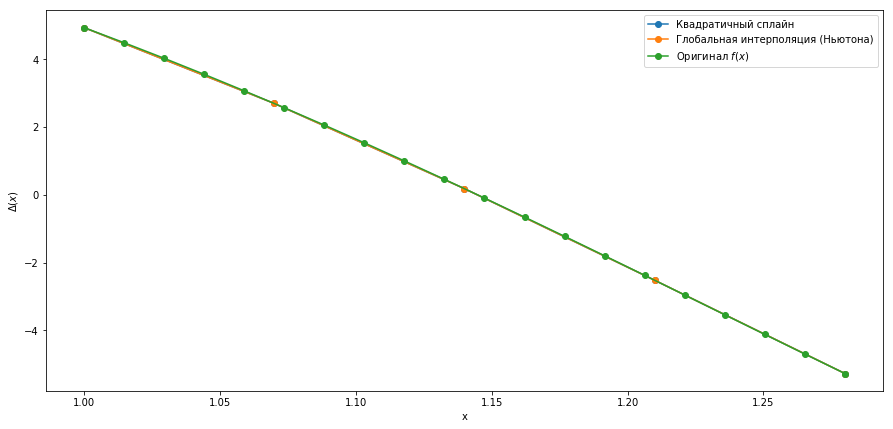

In [77]:
plt.figure(figsize=(15,7))
plt.plot(x_grid, y_quad_inter, 'o-', label = 'Квадратичный сплайн')
plt.plot(x_grid, y_new_inter, 'o-', label = 'Глобальная интерполяция (Ньютона)')
plt.plot(x, y, 'o-', label = 'Оригинал $f(x)$')

plt.xlabel('x')
plt.ylabel('$\Delta(x)$')
plt.legend();

### Находим ошибки на обоих приближениях

In [78]:
dis_new = []

for j in range(len(x_grid)):
    dis_new.append(func_9(x_grid[j]) - y_new_inter[j])

In [79]:
dis_slay = []

for j in range(len(x_grid)):
    dis_slay.append(func_9(x_grid[j]) - y_quad_inter[j])

### Строим график ошибок для обоих приближений для количества узлов $n=5$

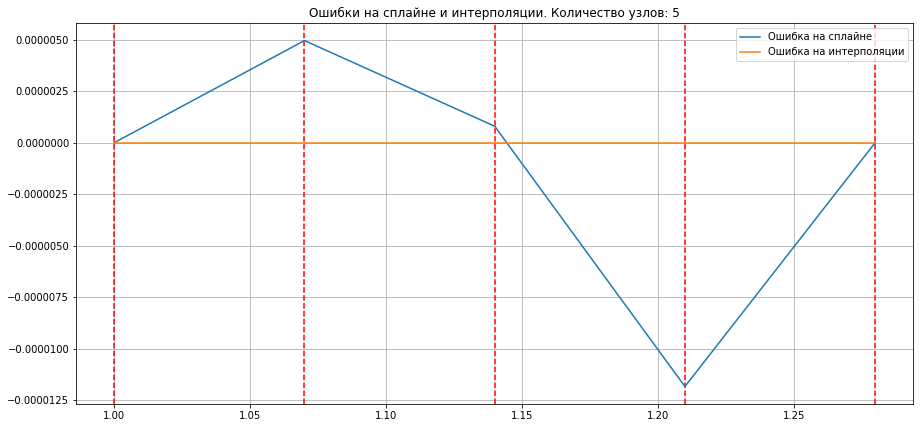

In [80]:
#Построим ошибки на узлах
plt.figure(figsize=(15,7))
plt.title('Ошибки на сплайне и интерполяции. Количество узлов: {}'.format(n))
plt.grid()
for xc in x_grid:
    plt.axvline(x=xc, ls = 'dashed', c='r')
plt.plot(x_grid,dis_slay, label = 'Ошибка на сплайне')
plt.plot(x_grid,dis_new, label = 'Ошибка на интерполяции');
plt.legend();

### Для демонстации, ошибка только на интерполяции:

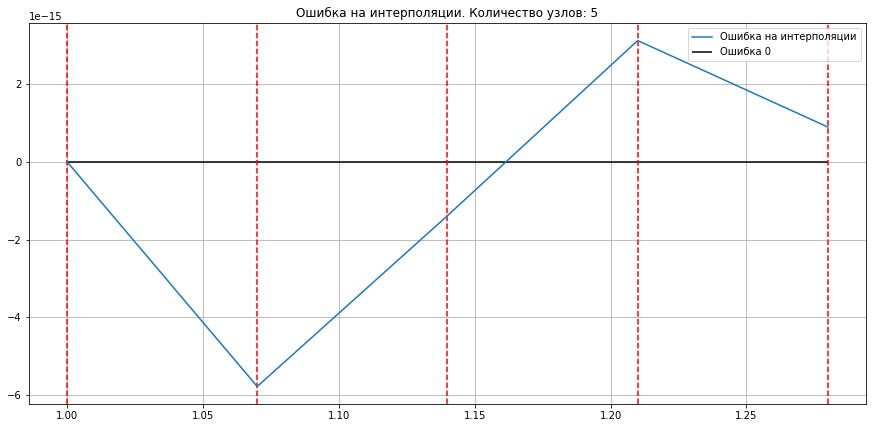

In [81]:
plt.figure(figsize=(15,7))
plt.title('Ошибка на интерполяции. Количество узлов: {}'.format(n))
plt.grid()
for xc in x_grid:
    plt.axvline(x=xc, ls = 'dashed',c='r')
plt.plot(x_grid,dis_new, label = 'Ошибка на интерполяции');
plt.hlines(y=0,xmin=a,xmax=b, label='Ошибка 0')
plt.legend();

### $\Rightarrow$ Интерполяция показала себя лучше

### Строим приближения глобальной интерполяции и квадратичным сплайном. Количество узлов $n=20$

In [82]:
n = 20

x_grid = np.linspace(a,b,n)

y_new_inter = new_interp(x,y,x_grid)
y_quad_inter = interpolate.interp1d(x,y, kind='quadratic')(x_grid)

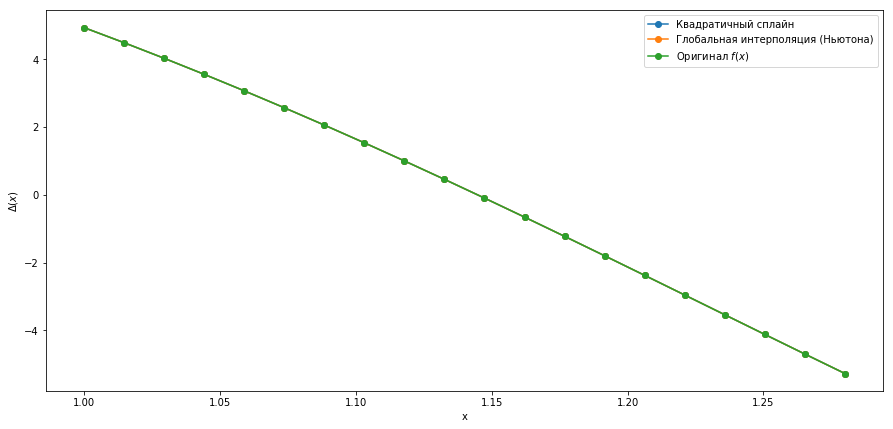

In [83]:
plt.figure(figsize=(15,7))
plt.plot(x_grid, y_quad_inter, 'o-', label = 'Квадратичный сплайн')
plt.plot(x_grid, y_new_inter, 'o-', label = 'Глобальная интерполяция (Ньютона)')
plt.plot(x, y, 'o-', label = 'Оригинал $f(x)$')

plt.xlabel('x')
plt.ylabel('$\Delta(x)$')
plt.legend();

### Находим ошибки на обоих приближениях

In [84]:
dis_new = []

for j in range(len(x_grid)):
    dis_new.append(func_9(x_grid[j]) - y_new_inter[j])

In [85]:
dis_slay = []

for j in range(len(x_grid)):
    dis_slay.append(func_9(x_grid[j]) - y_quad_inter[j])

### Строим график ошибок для обоих приближений для количества узлов $n=20$

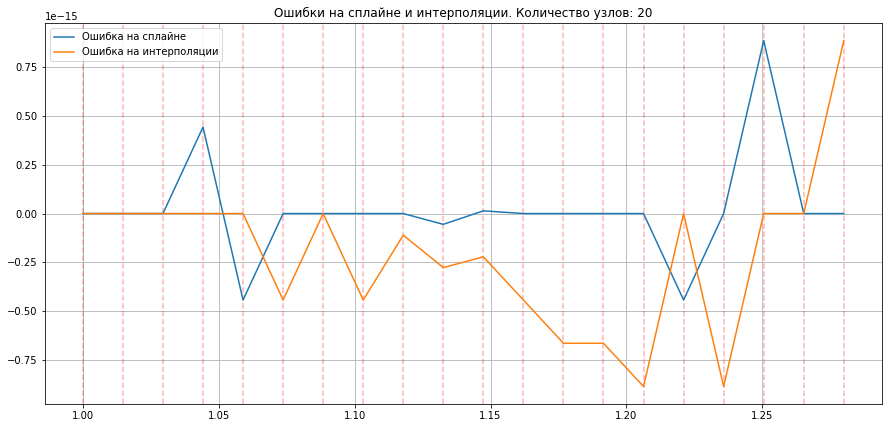

In [86]:
#Построим ошибки на узлах
plt.figure(figsize=(15,7))
plt.title('Ошибки на сплайне и интерполяции. Количество узлов: {}'.format(n))
plt.grid()
for xc in x_grid:
    plt.axvline(x=xc, ls = 'dashed', c='r', alpha = 0.3)
plt.plot(x_grid,dis_slay, label = 'Ошибка на сплайне')
plt.plot(x_grid,dis_new, label = 'Ошибка на интерполяции');
plt.legend();

### $\Rightarrow$ Сплайн показал себя лучше

### Строим приближения глобальной интерполяции и квадратичным сплайном. Количество узлов $n=50$

In [87]:
n = 50

x_grid = np.linspace(a,b,n)

y_new_inter = new_interp(x,y,x_grid)
y_quad_inter = interpolate.interp1d(x,y, kind='quadratic')(x_grid)

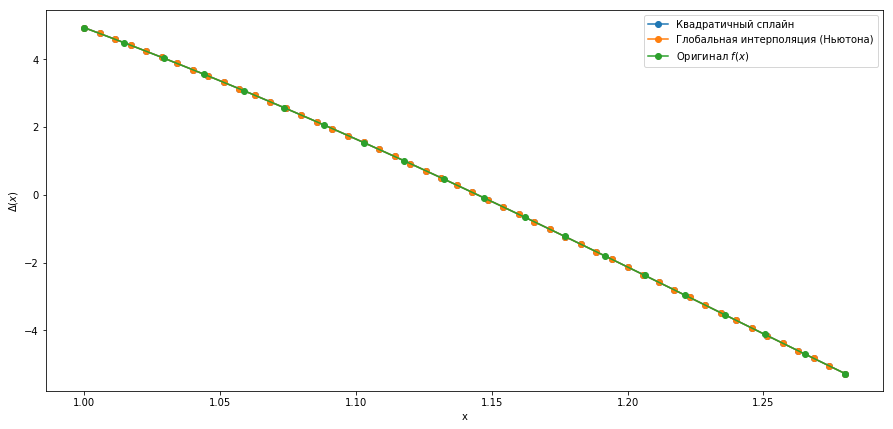

In [88]:
plt.figure(figsize=(15,7))
plt.plot(x_grid, y_quad_inter, 'o-', label = 'Квадратичный сплайн')
plt.plot(x_grid, y_new_inter, 'o-', label = 'Глобальная интерполяция (Ньютона)')
plt.plot(x, y, 'o-', label = 'Оригинал $f(x)$')

plt.xlabel('x')
plt.ylabel('$\Delta(x)$')
plt.legend();

### Находим ошибки на обоих приближениях

In [89]:
dis_new = []

for j in range(len(x_grid)):
    dis_new.append(func_9(x_grid[j]) - y_new_inter[j])

In [90]:
dis_slay = []

for j in range(len(x_grid)):
    dis_slay.append(func_9(x_grid[j]) - y_quad_inter[j])

### Строим график ошибок для обоих приближений для количества узлов $n=50$

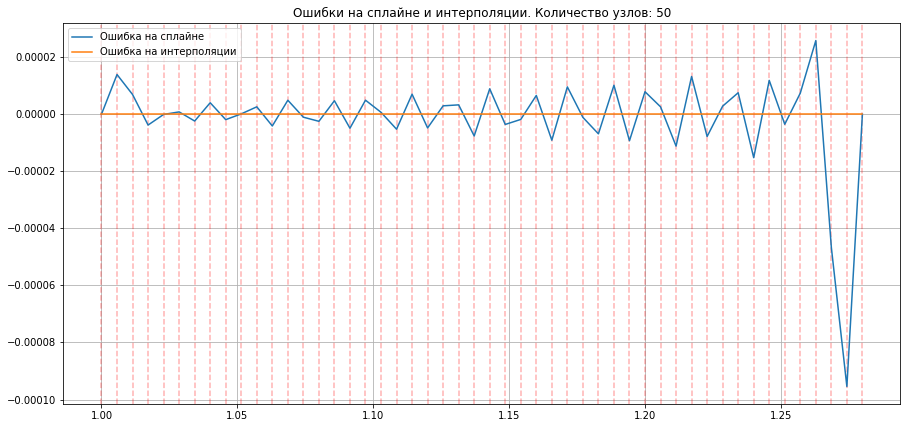

In [91]:
#Построим ошибки на узлах
plt.figure(figsize=(15,7))
plt.title('Ошибки на сплайне и интерполяции. Количество узлов: {}'.format(n))
plt.grid()
for xc in x_grid:
    plt.axvline(x=xc, ls = 'dashed', c='r', alpha = 0.3)
plt.plot(x_grid,dis_slay, label = 'Ошибка на сплайне')
plt.plot(x_grid,dis_new, label = 'Ошибка на интерполяции');
plt.legend();

### Для демонстации, ошибка только на интерполяции:

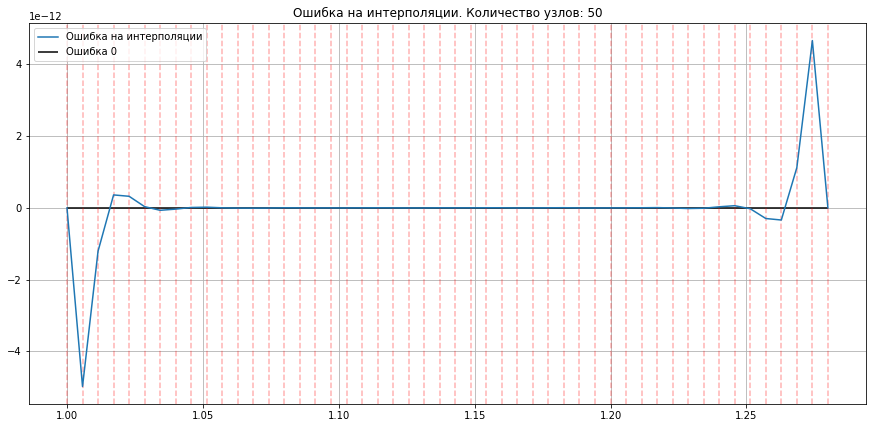

In [93]:
plt.figure(figsize=(15,7))
plt.title('Ошибка на интерполяции. Количество узлов: {}'.format(n))
plt.grid()
for xc in x_grid:
    plt.axvline(x=xc, ls = 'dashed',c='r', alpha=0.3)
plt.plot(x_grid,dis_new, label = 'Ошибка на интерполяции');
plt.hlines(y=0,xmin=a,xmax=b, label='Ошибка 0')
plt.legend();

### $\Rightarrow$ Интерполяция показала себя лучше